In [4]:
#Segio Muñoz Martin
#Camilo Garreta 

#taller aplicativo EDA

In [6]:
#Cargar librerias necesarias 
import pandas as pd
import os

In [28]:
#Cargar datos de Dataframe 
Banco = pd.read_csv("dataset_sintetico.csv" , sep = ',')

#Mostrar los datos en un dataframe 
Banco.head(2)

,ID,Edad,Salario,Puntuacion_Credito,Género,Estado_Civil,Compras_Anuales,Deuda
0,1,56,78053.0,454.0,Femenino,Soltero,11,12229.758009
1,2,69,41959.0,789.0,Femenino,Soltero,8,21445.590682


In [32]:
#Mostrar la estructura del Dataframe 
print(Banco.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  200 non-null    int64  
 1   Edad                200 non-null    int64  
 2   Salario             180 non-null    float64
 3   Puntuacion_Credito  180 non-null    float64
 4   Género              200 non-null    object 
 5   Estado_Civil        200 non-null    object 
 6   Compras_Anuales     200 non-null    int64  
 7   Deuda               200 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 12.6+ KB
None


In [36]:
#Mostrar Resumen Estadistico de variables numericas 
print(Banco.describe())

               ID       Edad        Salario  Puntuacion_Credito  \
count  200.000000  200.00000     180.000000          180.000000   
mean   100.500000   43.42500   68650.238889          561.872222   
std     57.879185   14.94191   29810.242548          160.000211   
min      1.000000   18.00000   20301.000000          304.000000   
25%     50.750000   31.00000   42603.000000          424.750000   
50%    100.500000   43.50000   67843.500000          545.500000   
75%    150.250000   56.00000   93125.750000          697.500000   
max    200.000000   69.00000  119522.000000          847.000000   

       Compras_Anuales         Deuda  
count       200.000000    200.000000  
mean         24.675000  11597.653901  
std          14.432284  10083.186002  
min           1.000000     33.154905  
25%          11.000000   3799.104052  
50%          26.000000   8773.057626  
75%          37.000000  16677.209379  
max          49.000000  42434.935129  


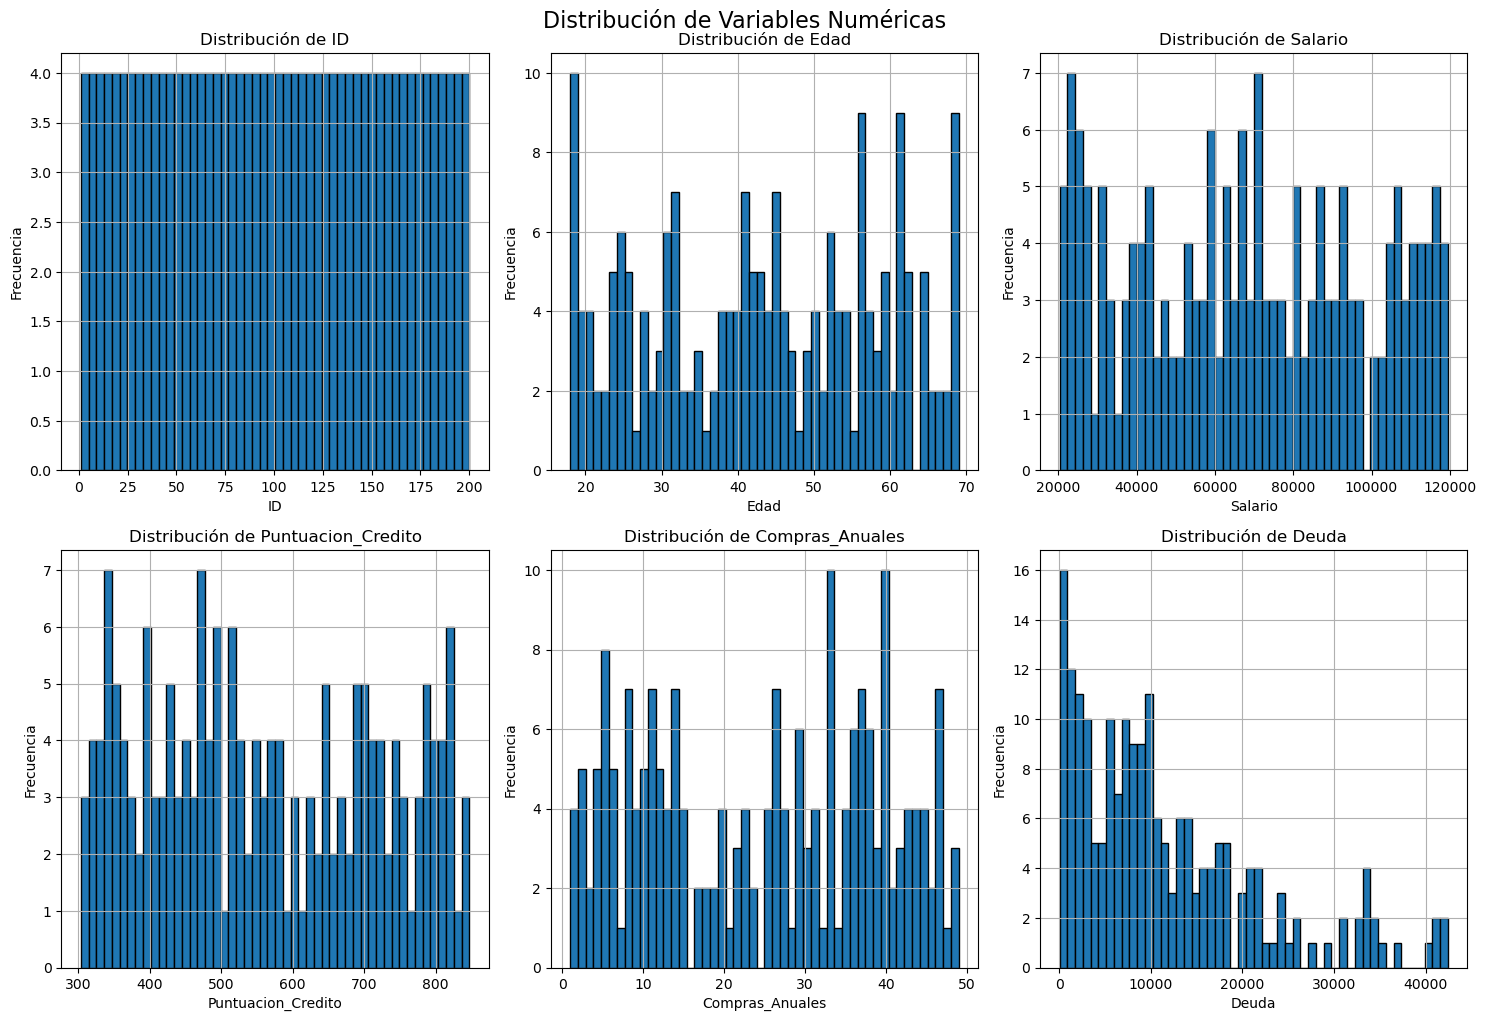

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar solo las columnas numéricas
columnas_numericas = Banco.select_dtypes(include=[np.number]).columns

# Definir la estructura del subplot
n = len(columnas_numericas)
nrows = 3  # Número de filas fijo en 3
ncols = min(n, 3)  # Máximo 3 columnas

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)

# Asegurar que los ejes son iterables
axes = axes.flatten() if n > 1 else [axes]

# Generar los histogramas para cada variable numérica
for i, col in enumerate(columnas_numericas):
    ax = axes[i]
    Banco[col].dropna().hist(ax=ax, bins=50, edgecolor='black')  # Eliminamos NaN antes de graficar
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Ocultar subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()